In [1]:
%pylab notebook

import pandas as pd
import numpy as np
import datetime
import os

import ipywidgets as widgets

from cognite.config import configure_session
from cognite.v05.timeseries import get_datapoints_frame, get_timeseries
from cognite.v05.assets import get_asset, get_assets, get_asset_subtree
from cognite.v05.events import get_events, get_event, search_for_events

Populating the interactive namespace from numpy and matplotlib


In [2]:
configure_session(os.environ.get('Public_key'), 'publicdata')

In [3]:
p_in_tag  = 'VAL_23-PT-92532:X.Value'
T_in_tag  = 'VAL_23_TT_92532:Z.X.Value'
Q_tag     = 'VAL_23-FT-92537-01:X.Value'
p_out_tag = 'VAL_23-PT-92539:X.Value'
T_out_tag = 'VAL_23_TT_92536:Z.X.Value'
all_tags  = [p_in_tag, T_in_tag, Q_tag, T_out_tag, p_out_tag]

In [4]:
start = 0
end = 'now'
data = get_datapoints_frame(all_tags, 
                            start=start, 
                            end=end,
                            granularity='1d', 
                            aggregates=['avg'])

<IPython.core.display.Javascript object>


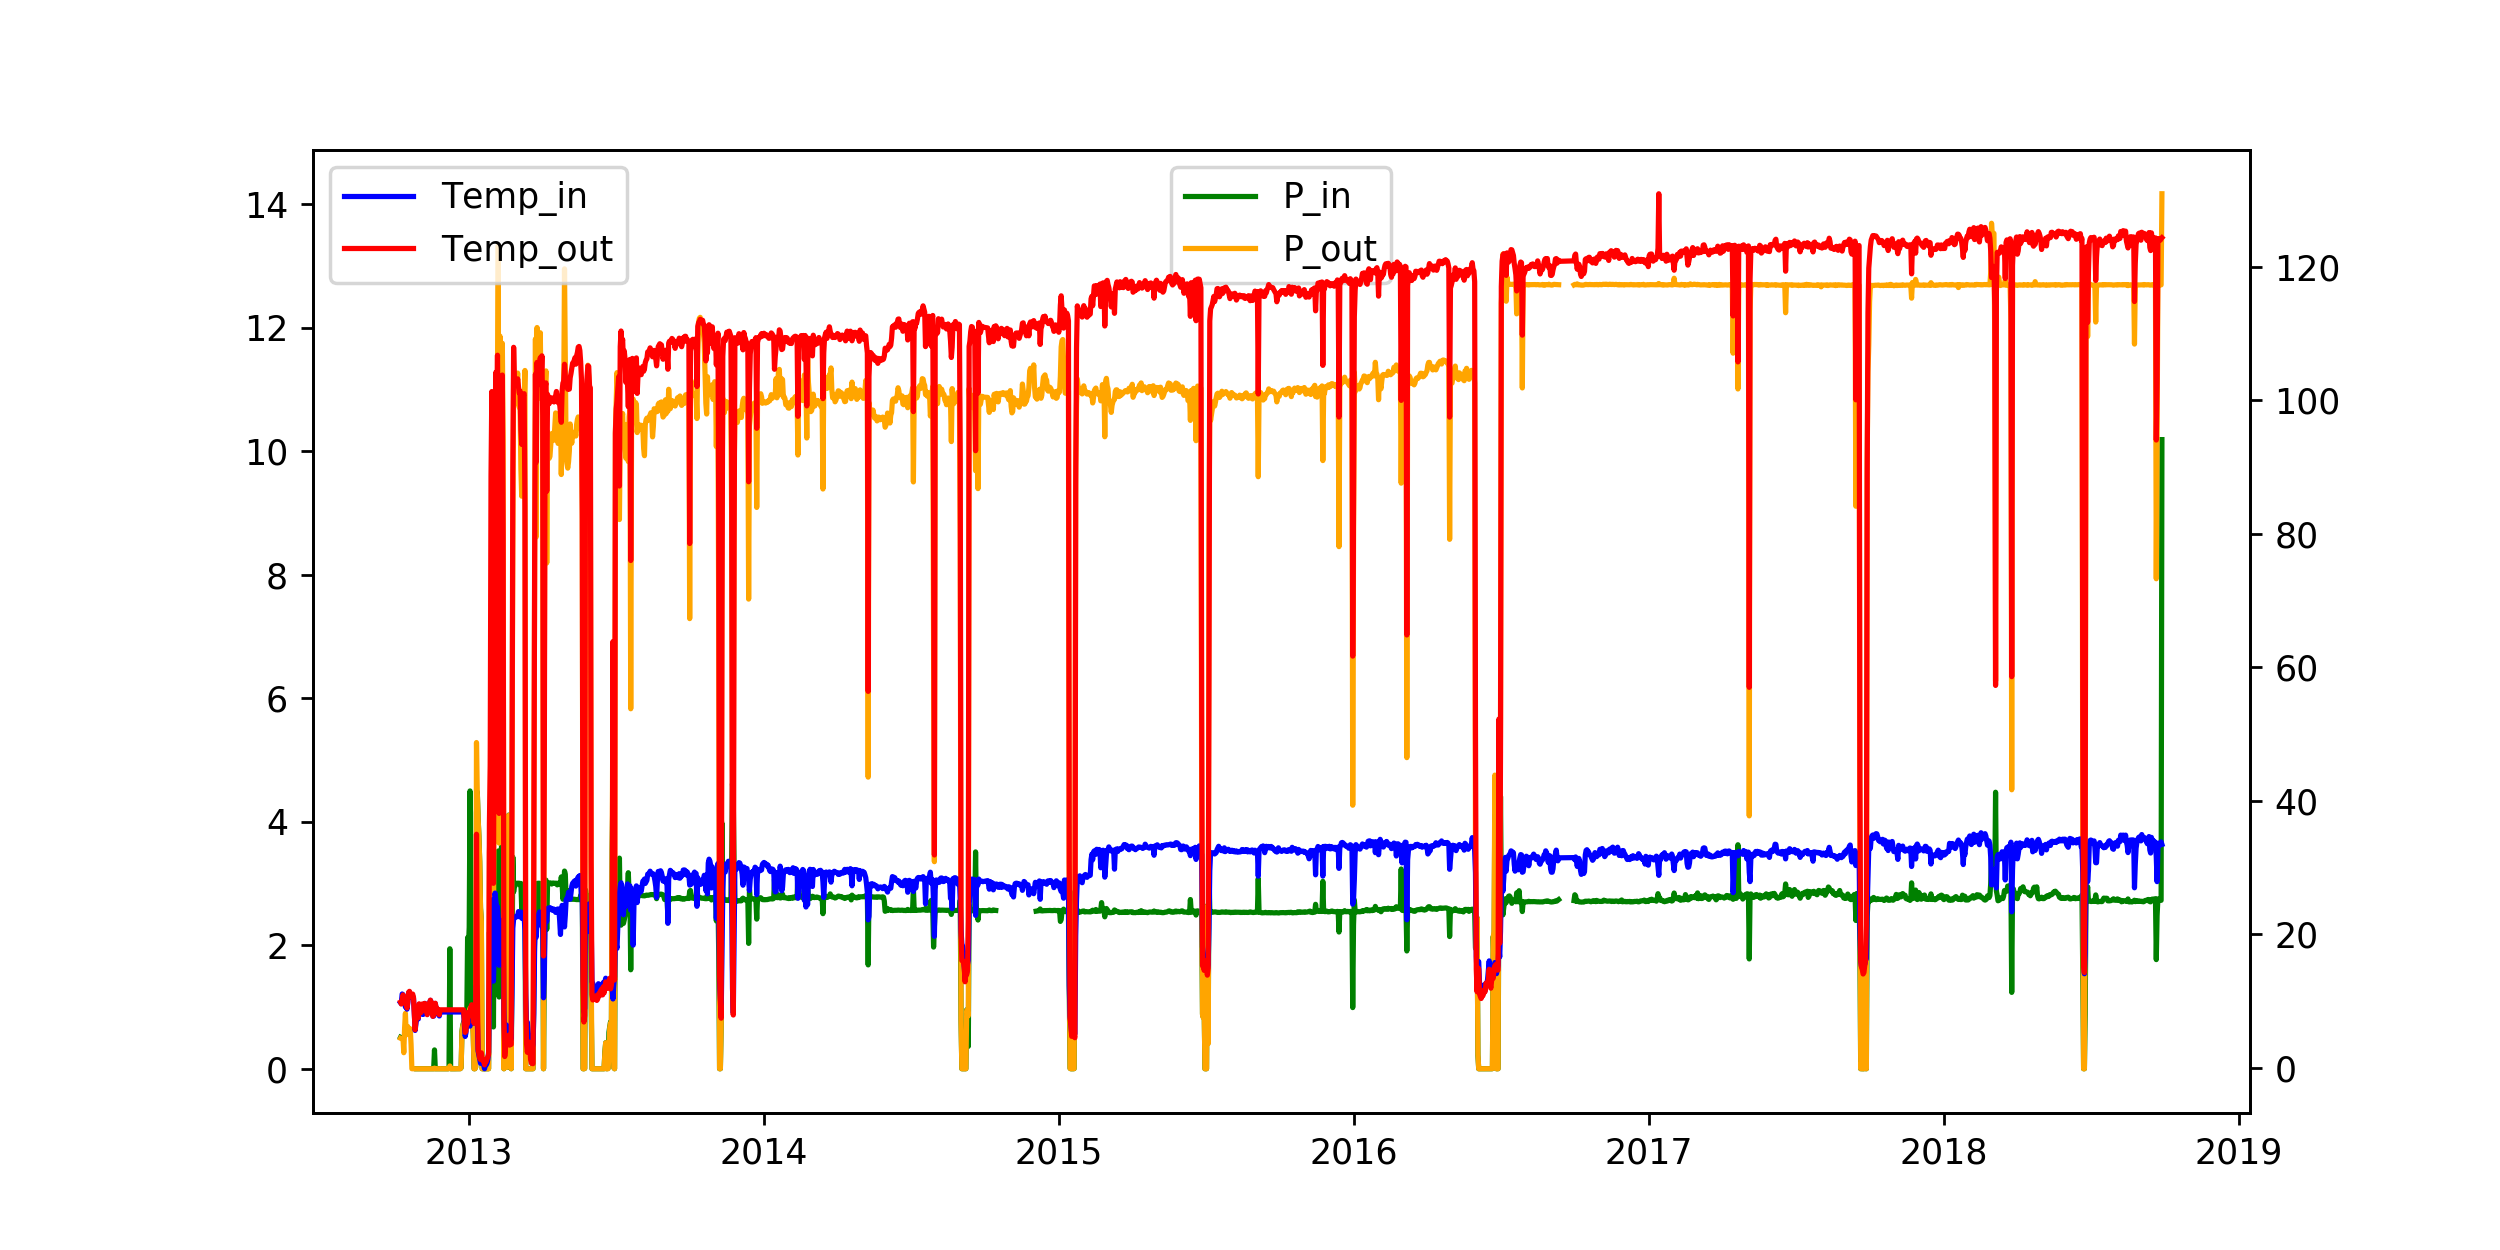

In [5]:
time = pd.to_datetime(data.timestamp, unit='ms')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time, data[p_in_tag+'|average'], label='P_in', color='green')
ax.plot(time, data[p_out_tag+'|average'], label='P_out', color='orange')
ax2 = ax.twinx()
ax2.plot(time, data[T_in_tag+'|average'], label='Temp_in', color='blue')
ax2.plot(time, data[T_out_tag+'|average'], label='Temp_out', color='red')
ax.legend()
tmp=ax2.legend()



<IPython.core.display.Javascript object>


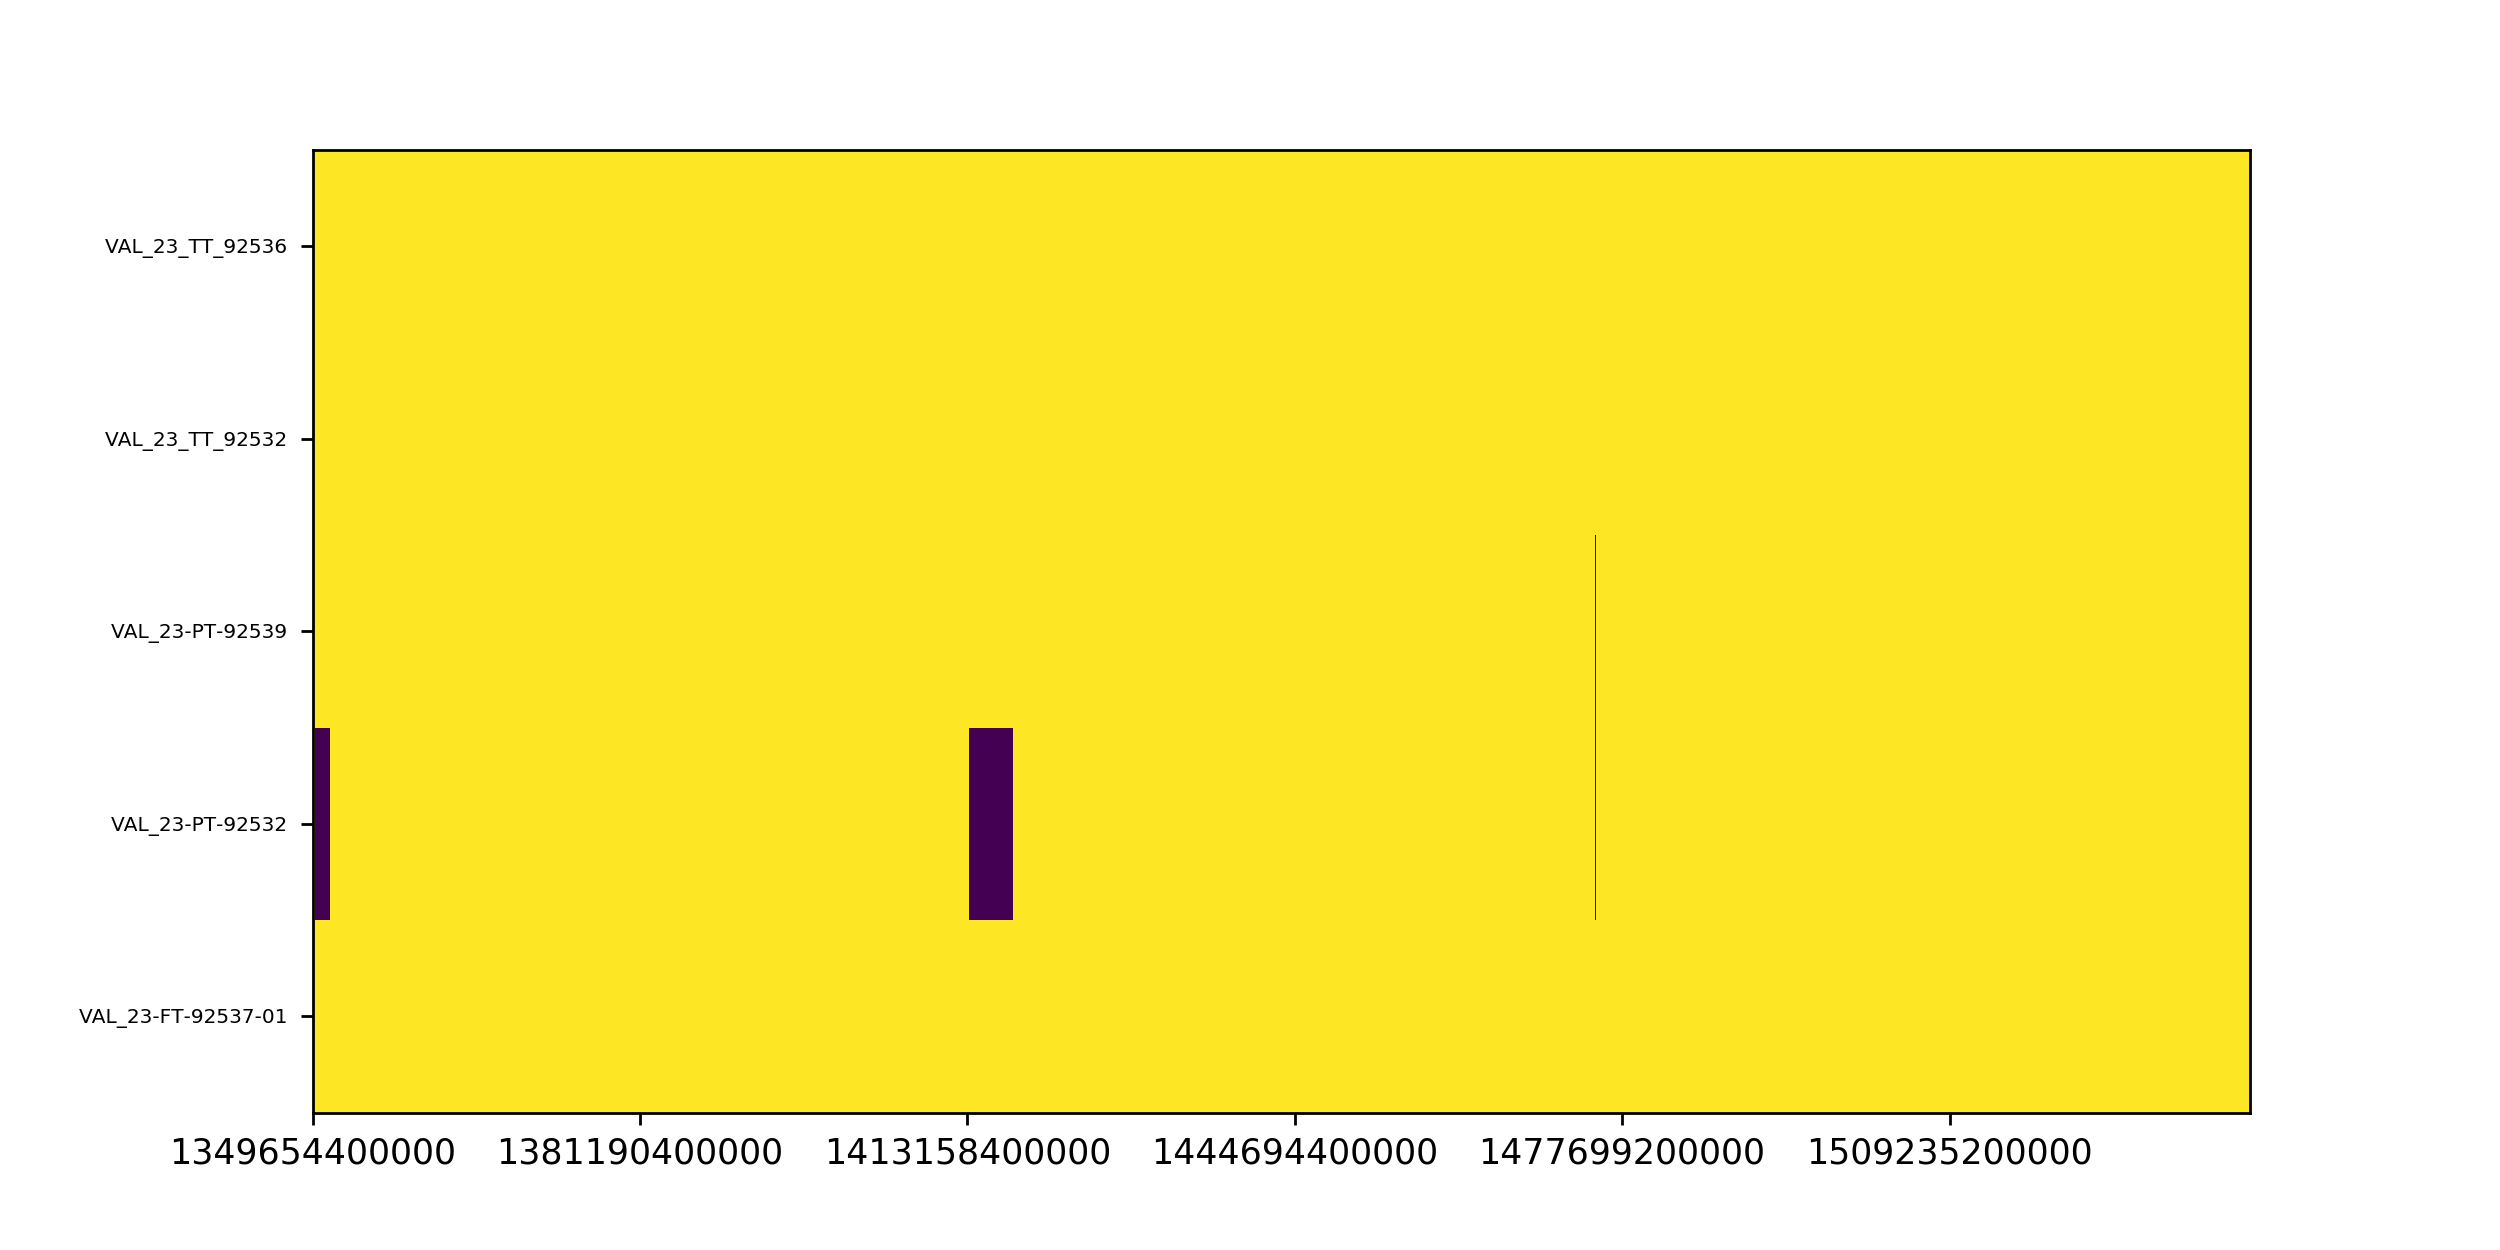

In [6]:
df = data.copy()
df_nan = 0.5*(~df.isnull().astype(int)+1)

plt.figure(figsize=(10,5))
A= plt.pcolor(df_nan.drop(['timestamp'], axis=1).values.transpose())
yloc = np.arange(0.5, len(df_nan.columns)-1+0.5)
ytick = [w[0] for w in list(df_nan.drop(['timestamp'],axis=1).columns.str.split(':'))]
A =plt.yticks(yloc, ytick, fontsize='xx-small')
xtick = [str(w).split('-')[0] for w in df.timestamp[df.index%365==0].values] 
xloc = np.arange(0, len(df), 365)
A = plt.xticks(xloc, xtick)